<a href="https://colab.research.google.com/github/forbxpg/Thermochemical-properties/blob/main/lammps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
R = 8.315
mass = 39.948
nist_path = "nist"
csv_files_paths = ["120", "150", "200", "300", "400", "500", "600"]
csv_files_names = ["1.csv", "25.csv", "50.csv", "75.csv"]

In [ ]:
def calculate_lammps_data(csv_path: str, csv_filenames: list) -> dict:
    pressures = []
    densities = []
    for filename in csv_filenames:
        data = pd.read_csv(f"/content/{csv_path}/{filename}")
        need_data = data[(data["Step"] >= 290000) & (data["Step"] < 300000)]
        density, pressure = need_data["Density"].mean(), need_data["Press"].mean()
        pressures.append(pressure)
        densities.append(density)
    return {
            "pressures": pressures,
            "densities": densities,
        }

In [ ]:
for path in csv_files_paths:
    print(calculate_lammps_data(path, csv_files_names))

{'pressures': [np.float64(0.9971074484999999), np.float64(25.0985471), np.float64(49.9772407), np.float64(75.01878525)], 'densities': [np.float64(0.004027368589999999), np.float64(0.09523181785000001), np.float64(0.1786710375), np.float64(0.25481035650000006)]}
{'pressures': [np.float64(1.0030940480000001), np.float64(25.698316499999997), np.float64(49.93872184999999), np.float64(75.20673425000001)], 'densities': [np.float64(0.00323872937), np.float64(0.077939028), np.float64(0.146682544), np.float64(0.21067291999999999)]}
{'pressures': [np.float64(0.99622371), np.float64(24.797186099999998), np.float64(50.21970965), np.float64(74.93970085)], 'densities': [np.float64(0.002433092715), np.float64(0.05819592875), np.float64(0.113085017), np.float64(0.1635228935)]}
{'pressures': [np.float64(1.003706806), np.float64(24.93516115), np.float64(50.2312501), np.float64(74.8731975)], 'densities': [np.float64(0.0016262321350000001), np.float64(0.0394388968), np.float64(0.07738511229999999), np.flo

In [ ]:
def calculate_nist_data(temperature: int) -> dict:
    data = pd.read_csv(f"/content/{nist_path}/{temperature}.csv", sep='\t')
    return {
        "pressures": data["Pressure (atm)"].tolist(),
        "densities": data["Density (g/ml)"].tolist(),
    }

In [ ]:
print(calculate_nist_data(120))

{'pressures': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 11.972, 11.972, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0], 'densities': [0.0041122, 0.0083409, 0.012696, 0.017189, 0.021832, 0.026641, 0.031635, 0.036834, 0.042266, 0.047963, 0.053966, 0.060144, 1.1628, 1.1628, 1.1637, 1.1646, 1.1654, 1.1663, 1.1671, 1.1679, 1.1687, 1.1696, 1.1704, 1.1712, 1.172, 1.1728, 1.1736, 1.1744, 1.1752, 1.1759, 1.1767, 1.1775, 1.1783, 1.179, 1.1798, 1.1805, 1.1813, 1.182, 1.1828, 1.1835, 1.1842, 1.185, 1.1857, 1.1864, 1.1871, 1.1878, 1.1885, 1.1892, 1.1899, 1.1906, 1.1913, 1.192, 1.1927, 1.1934, 1.1941, 1.1947, 1.1954, 1.1961, 1.1968, 1.1974, 1.1981, 1.19

In [ ]:
def calculate_ideal_gas(temperature: int) -> dict:
    densities = np.linspace(0.0001, 0.2, 75)
    pressures = [R * temperature * volume * 10 / mass for volume in densities]
    return {
        "pressures": pressures,
        "densities": densities,
    }

In [ ]:
def make_graph(temperature: int, x_max: float = 0.2, y_max: int = 100):
    plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
    plt.figure(figsize = (12, 8))
    plt.grid = True
    plt.ylim(0, y_max)
    plt.xlim(0, x_max)
    plt.ylabel("Давление P [atm]")
    plt.xlabel("Плотность ρ [g/ml]")
    plt.title(f"График зависимости P(ρ) при заданной температуре {temperature}K")

    lammps_pressures, lammps_densities = calculate_lammps_data(str(temperature), csv_files_names)["pressures"], calculate_lammps_data(str(temperature), csv_files_names)["densities"]
    nist_pressures, nist_densities = calculate_nist_data(temperature)["pressures"], calculate_nist_data(temperature)["densities"]
    ideal_gas_pressures, ideal_gas_densities = calculate_ideal_gas(temperature)["pressures"], calculate_ideal_gas(temperature)["densities"]

    plt.plot(nist_densities, nist_pressures, color="blue", label="NIST")
    plt.plot(lammps_densities, lammps_pressures, color="yellow", label="LAMMPS")
    plt.scatter(ideal_gas_densities, ideal_gas_pressures, color="green", label="Ideal gas")
    plt.legend()
    plt.savefig(f'graph-{temperature}')

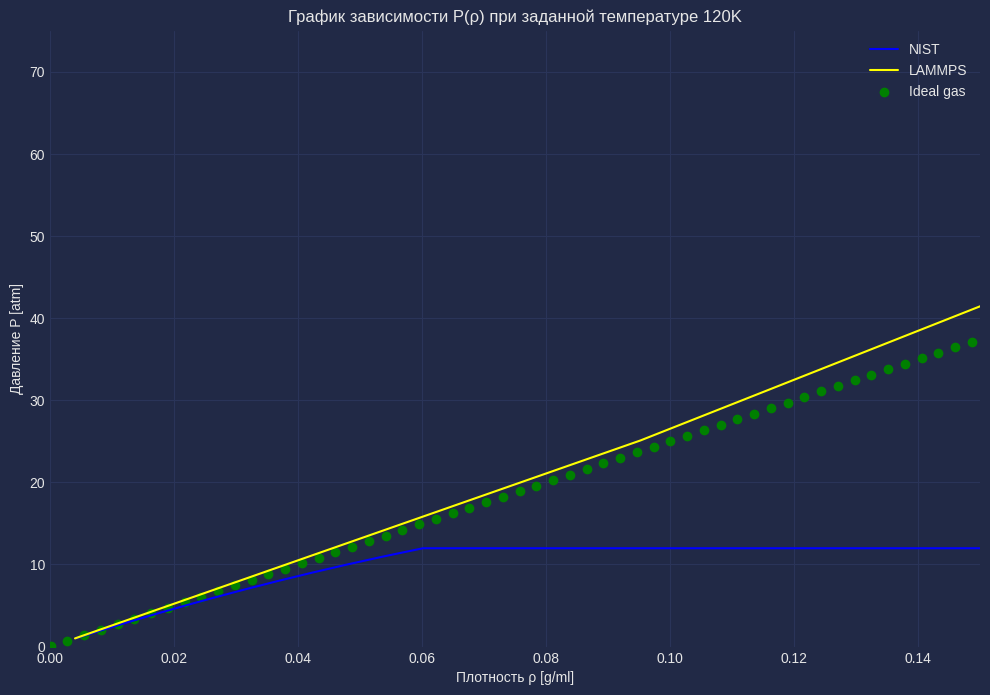

In [ ]:
make_graph(120, 0.15, 75)

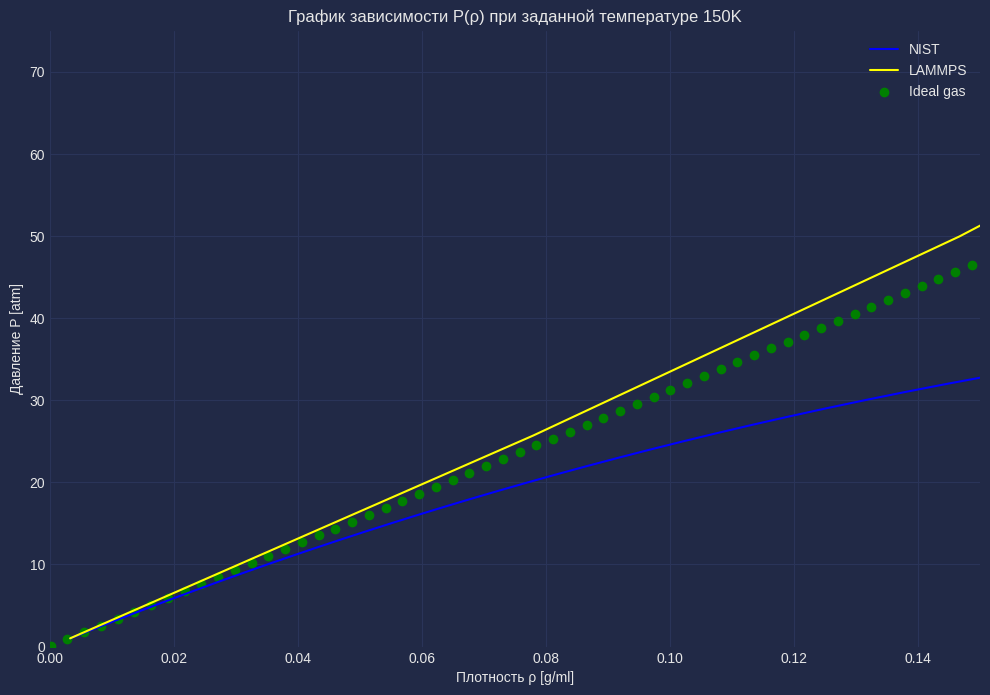

In [ ]:
make_graph(150, 0.15, 75)

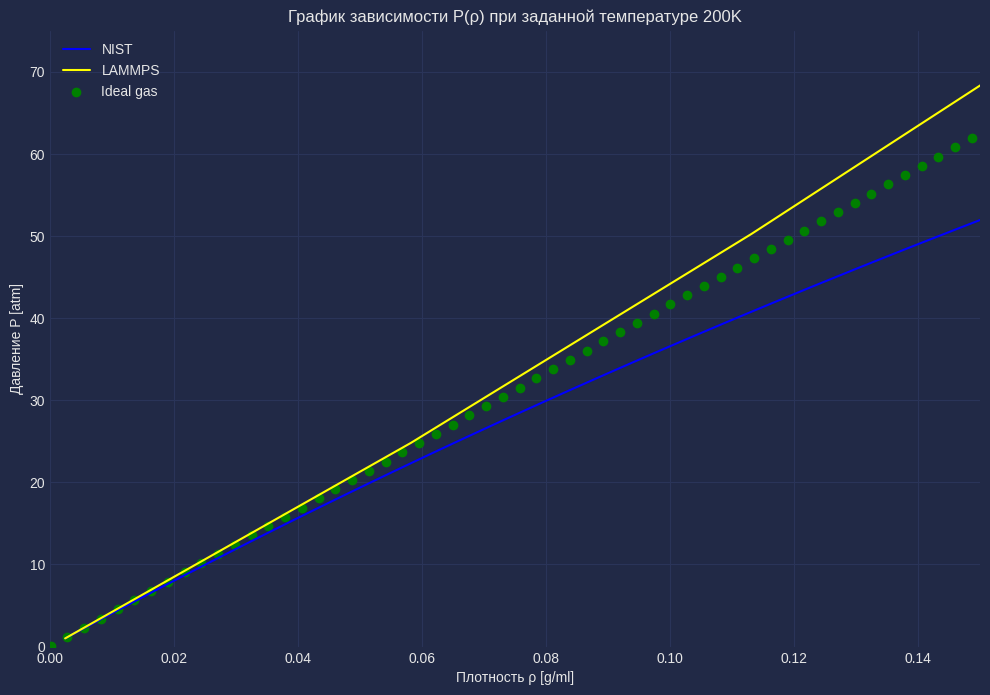

In [ ]:
make_graph(200, 0.15, 75)

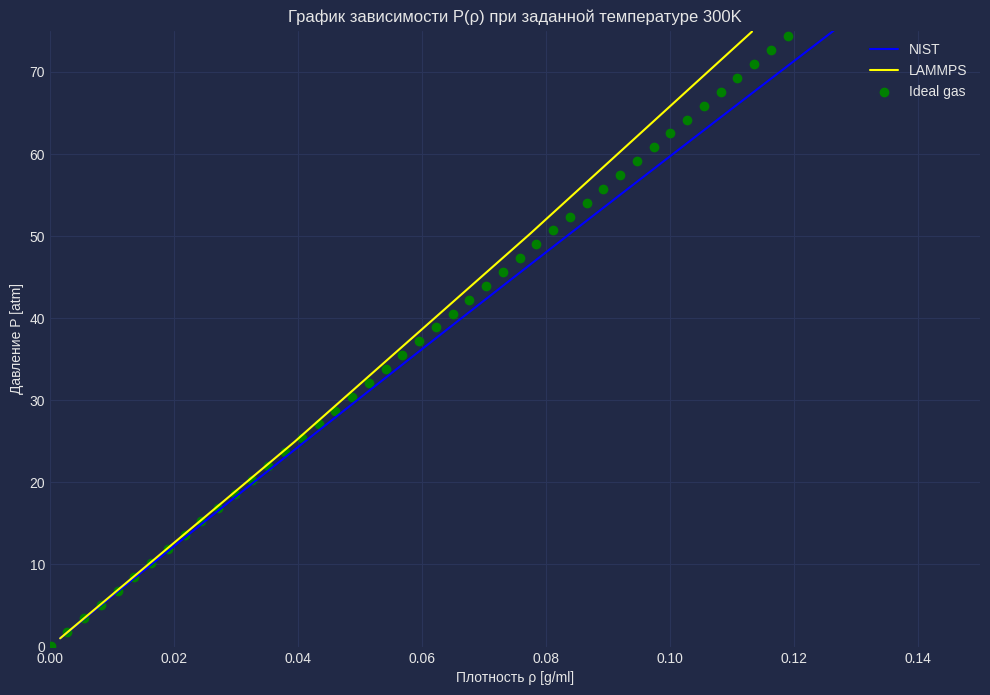

In [ ]:
make_graph(300, 0.15, 75)

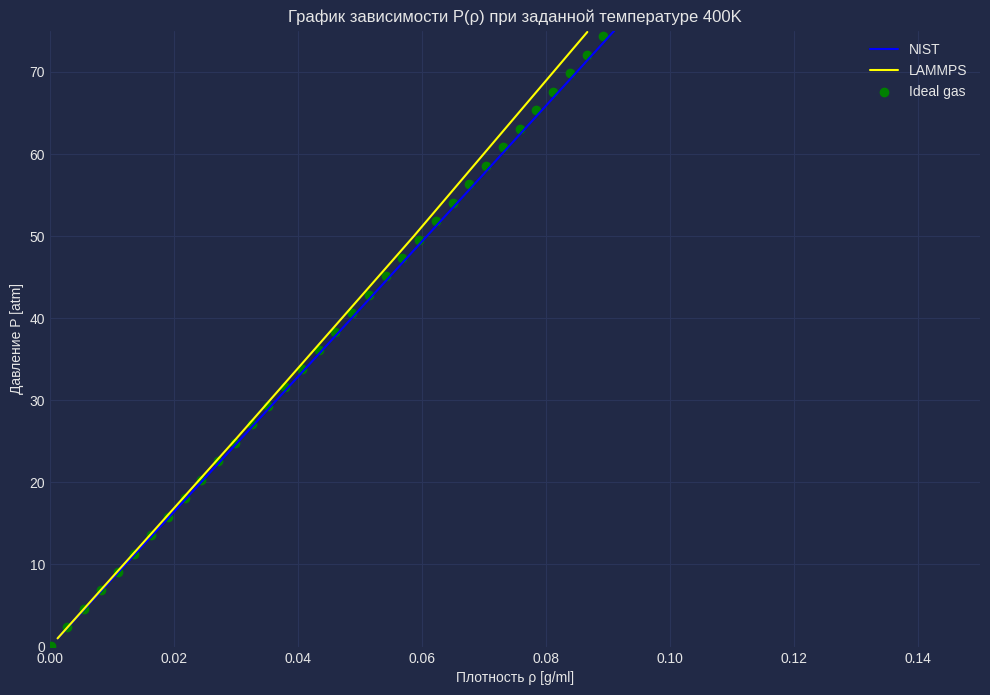

In [ ]:
make_graph(400, 0.15, 75)

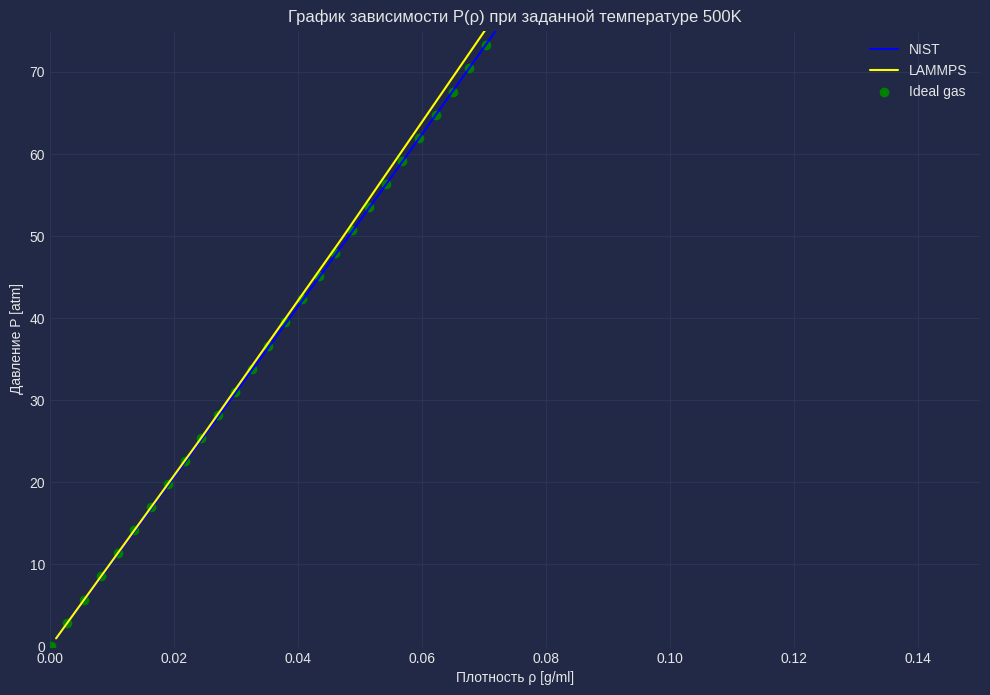

In [ ]:
make_graph(500, 0.15, 75)

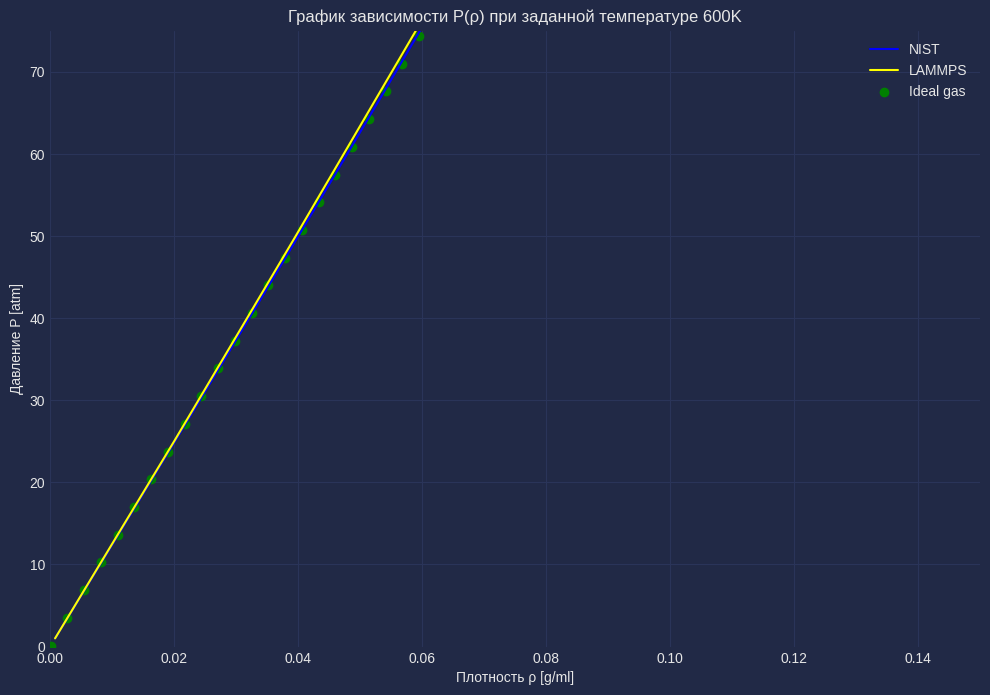

In [ ]:
make_graph(600, 0.15, 75)